# Question 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from sympy import *
from IPython.display import display, Math
smp.init_printing()

## Part 1: Dealing with $\alpha$

In class we showed that

$$\alpha = \frac{q^2 \omega^2 N}{mc \epsilon_0} \sum_j \frac{f_j \gamma_j}{(\omega_j^2-\omega^2)^2+\gamma_j^2 \omega^2} $$

In the case of one natural frequency $\omega_1$ it follows that

$$\alpha = \frac{q^2 \omega^2 N}{mc \epsilon_0} \frac{f \gamma}{(\omega_1^2-\omega^2)^2+\gamma^2 \omega^2} $$

We will absorb all the constants into 1 big constant $A$ by defining 

$$ \alpha \equiv \frac{A \gamma}{(\omega_1^2-\omega^2)^2+\gamma^2 \omega^2}$$

The maximimum either occurs when $d\alpha/d\omega=0$ or as $\omega \to \pm \infty$. Since $\omega \to \infty$ sends $\alpha \to 0$, the maximum must occur when the derivative is zero. Lets use sympy to solve for this value of $\omega$.

In [2]:
A, gam, w1, w = smp.symbols('A gamma omega_1 omega')

Define $\alpha$

In [3]:
alpha = A*gam/((w1**2-w**2)**2+gam**2*w**2)

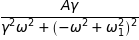

In [4]:
alpha

Lets find the values of $\omega$ that make $\alpha$ is an extrema.

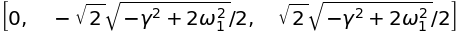

In [5]:
sols = solve(diff(alpha, w), w)
sols

Note that the final two are solutions only if $2\omega_1^2>\gamma^2$.

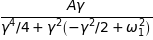

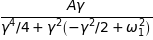

In [6]:
display(alpha.subs(w, sols[0]).simplify())
display(alpha.subs(w, sols[1]))
display(alpha.subs(w, sols[2]))

The maximum value is always the first one when $2\omega_1^2 < \gamma^2$.

$$\boxed{\alpha_{max}^{(1)}=\frac{A \gamma}{\omega_1^4}} $$

When $2 \omega_1^2 > \gamma^2$ then we have

$$\frac{\gamma^4}{4}+\gamma^2\left( -\frac{\gamma^2}{2} +\omega_1^2 \right)=\gamma^2\omega_1^2 - \frac{\gamma^2}{4} < (2\omega_1^2)\omega_1^2 - \frac{(2\omega_1)^2}{4} = \omega_1^4 $$

In this case the second and third solutions are the maximum

$$\boxed{\alpha_{max}^{(2)}=\frac{A \gamma}{\gamma^2(\omega_1^2-\frac{\gamma^2}{4})}} $$

Lets solve for the frequencies that give these values in each case.

In [7]:
alpha_half_1 = alpha.subs(w, sols[0])/2
alpha_half_2 = alpha.subs(w, sols[1])/2

w_halfs_1 = solve(alpha-alpha_half_1, w)
w_halfs_2 = solve(alpha-alpha_half_2, w)

**Case 1**:

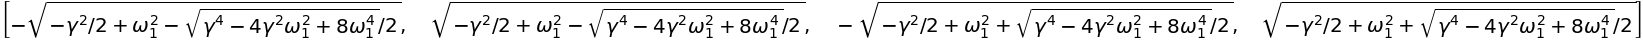

In [8]:
w_halfs_1

**Case 2**:

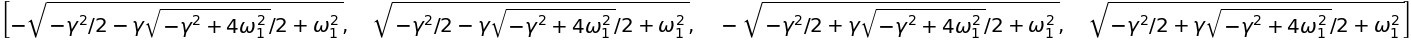

In [9]:
w_halfs_2

Of course, we're only really interested in the positive frequencies, but it is reassuring that for every positive solution there is also a negative one. Lets make sure they give the correct values.

**Case 1**:

In [10]:
display(alpha_half_1 - alpha.subs(w, w_halfs_1[1]).simplify())
display(alpha_half_1 - alpha.subs(w, w_halfs_1[3]).simplify())

**Case 2**:

In [11]:
display((alpha.subs(w, w_halfs_2[1])-alpha_half_2).simplify())
display((alpha.subs(w, w_halfs_2[3])-alpha_half_2).simplify())

Perfect.

## Part 2: Deal with n

In class we showed that

$$n=1+\frac{Nq^2}{2m\epsilon_0}\sum_j\frac{f_j(\omega_j^2-\omega^2)}{(\omega_j^2-\omega^2)^2+\gamma_j^2\omega^2} $$

In the case of one natural frequency $\omega_1$ it follows that

$$n=1+\frac{Nq^2}{2m\epsilon_0}\frac{f(\omega_1^2-\omega^2)}{(\omega_1^2-\omega^2)^2+\gamma^2\omega^2} $$

We can absorb all the constants into one big constant $A$ by defining

$$n \equiv 1+A\frac{\omega_1^2-\omega^2}{(\omega_1^2-\omega^2)^2+\gamma^2\omega^2} $$

Note that as $\omega \to \pm \infty$ then $n \to 1$. We can look for maximum and minimum values by considering the places where the derivative is zero.

In [12]:
n = 1+ A*(w1**2-w**2)/((w1**2-w**2)**2+gam**2*w**2)

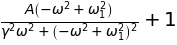

In [13]:
n

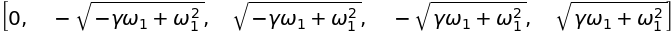

In [14]:
sols = solve(diff(n, w), w)
sols

Lets plug these all in and see what the results are. Note that the zero maxima corresponds to the limit where $\omega \to 0$; light of zero frequency is nothing at all.

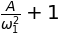

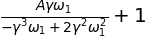

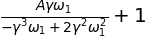

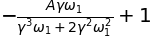

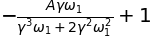

In [15]:
for sol in sols:
    display(n.subs(w, sol).expand())

These expressions can be simplified further and we see that there are three minima/maxima for $n$:

$$1+\frac{A}{\omega_1^2}$$

$$1+\frac{A}{\gamma(2\omega_1-\gamma)} $$

$$1-\frac{A}{\gamma(2\omega_1+\gamma)} $$

The first value is always greater than 1 and the third value is always less than one (so the minima and maxima are **atleast** at these points and not at $\omega=\pm \infty$). The value of the second value determines where the true minimum and maximum exist on the curve.

**Case 1**: If $\omega_1^2< \gamma(2\omega_1-\gamma)$ and $\gamma(2\omega_1-\gamma)>0$ then (i) is the maximum and (iii) is the minimum.

**Case 2**: If $0<\gamma(2\omega_1-\gamma)<\omega_1^2$ then (ii) is the maximum and (iii) is the minimum.

**Case 3**: If - $\gamma(2\omega_1+\gamma) < \gamma(2\omega_1-\gamma) < 0 $ then (i) is maximum and (ii) is minimum.